In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [19]:
df = pd.read_csv('data.smi', sep = '\t', header = None)
df

,0,1,2
0,COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21,4.17,0.909
1,COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O,2.79,0.839
2,C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1,5.30,0.828
3,Cc1ccc([C@@H](O)C#CC(O)(c2ccccc2)c2ccccc2)o1,3.53,0.726
4,CC(C)(C)c1cc(Cc2ccccc2)n[nH]1,4.35,0.816
...,...,...,...
239,Cc1cccc(NC(=O)C[C@@H]2S/C(=N\c3c(C)cccc3C)N(C)...,4.75,0.863
240,CCOc1ccccc1OCC(=O)Nc1ccc2ccccc2c1,4.73,0.737
241,OCC#CC(O)(c1ccc(F)cc1)c1ccc(F)cc1,3.61,0.824
242,CC(=O)Nc1ccc(/N=C/c2c([O-])oc3ccccc3c2=O)cc1,3.64,0.750


In [22]:
y_true = df.iloc[:, 1]
y_true

0      4.17
1      2.79
2      5.30
3      3.53
4      4.35
       ... 
239    4.75
240    4.73
241    3.61
242    3.64
243    3.11
Name: 1, Length: 244, dtype: float64

In [51]:
df_desc = pd.DataFrame(
    df.iloc[:, 0].apply(Chem.MolFromSmiles).apply(Descriptors.CalcMolDescriptors).tolist()
)

In [52]:
y_pred = df_desc.MolLogP
y_pred

0      3.78614
1      1.91130
2      3.88010
3      3.56092
4      3.29800
        ...   
239    4.20196
240    4.25600
241    2.19640
242    2.57560
243    2.74790
Name: MolLogP, Length: 244, dtype: float64

In [17]:
from sklearn import metrics

In [83]:
metrics.r2_score(y_true, y_pred)

-0.4317356609050882

In [84]:
np.corrcoef(y_pred, y_true) ** 2

array([[1.        , 0.36107034],
       [0.36107034, 1.        ]])

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

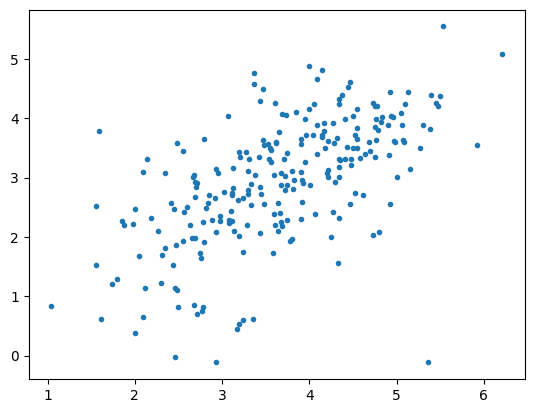

In [59]:
plt.plot(y_true, y_pred, '.')

In [87]:
linear_model.LinearRegression(fit_intercept=False).fit(
    y_true.to_numpy().reshape(-1, 1), y_pred
).score(y_true.to_numpy().reshape(-1, 1), y_pred)

0.3435099775213246

## form

In [108]:
y_mean = y_true.mean()
y_mean



3.6580737704918036

In [110]:
TSS = ((y_true-y_mean) ** 2).sum()
TSS

227.49559467213118

In [106]:
RSS = ((y_true - y_pred) ** 2).sum()
RSS

325.7135555908998

In [113]:
ESS =(( y_pred - y_mean) ** 2).sum()
ESS

395.8587401605723

In [114]:
R_22 = ESS/TSS
R_22

1.7400721131813024

In [111]:
R_2 = 1 - RSS/TSS
R_2

-0.4317356609050882

In [96]:
yy = pd.DataFrame({'y_true': list(y_true), 'y_pred': list(y_pred)})
yy

,y_true,y_pred
0,4.17,3.78614
1,2.79,1.91130
2,5.30,3.88010
3,3.53,3.56092
4,4.35,3.29800
...,...,...
239,4.75,4.20196
240,4.73,4.25600
241,3.61,2.19640
242,3.64,2.57560
